In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Multivariate Gaussian Distribution

The multivariate Gaussian distribution, also known as the multivariate normal distribution, is a generalization of the univariate normal distribution to higher dimensions.

### Probability Density Function (PDF)

A random vector $X = (X_1, \ldots, X_p)$ follows a p-variate normal distribution with parameters $\mu \in \mathbb{R}^p$ and $\Sigma \in \mathbb{R}^{p \times p}$. We denote this as $X \sim \mathcal{N}_p(\mu, \Sigma)$ if the pdf of $X$ is given by:

$$
f_X(x) = \frac{1}{{(2\pi)^{p/2} \sqrt{\text{det}(\Sigma)}}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$


where $\mu$ is the mean vector of the distribution, and $\Sigma$ the covariance matrix.

In [2]:
def multivariate_gaussian(x, mu, sigma):
    p = len(x)
    normalization_factor = 1/(np.power(2*np.pi, p/2) * (np.sqrt(LA.det(sigma))))
    squared_mahalanobis_distance = -0.5 * np.matmul(np.matmul((x - mu), LA.inv(sigma)),((x - mu).reshape(-1,1)))
    return (normalization_factor * np.exp(squared_mahalanobis_distance)).item()

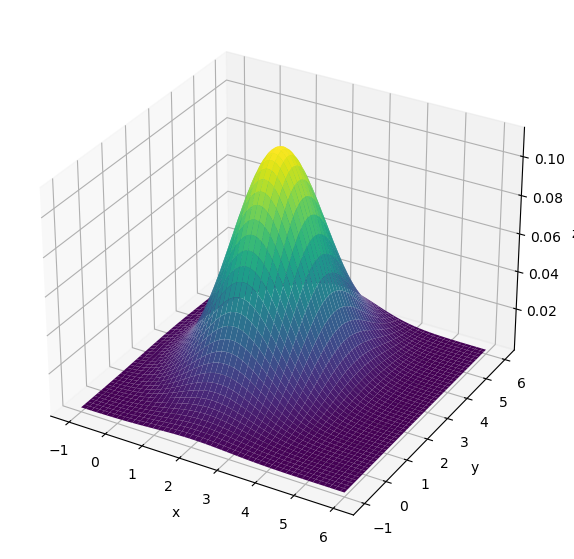

In [3]:
x = np.linspace(-1,6,200)
y = np.linspace(-1,6,200)

mean = np.array([2.0, 3.0])
cov = np.array([[1, 0], [0, 2]])

xv, yv = np.meshgrid(x, y)
combined_grid = np.vstack([xv.ravel(), yv.ravel()])
z = np.array([multivariate_gaussian(x, mean, cov) for x in combined_grid.T])
z = z.reshape(xv.shape)

ax = plt.figure(figsize=(10, 7)).add_subplot(projection='3d')
ax.plot_surface(xv, yv, z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [20]:
def plot_samples(mean, cov, sample_size=200):
    samples = np.random.multivariate_normal(mean, cov, sample_size)
    
    plt.figure(figsize=(10,7))
    plt.scatter(samples[:, 0], samples[:, 1])
    
    eigenvalues, eigenvectors = LA.eig(cov)
    
    norm_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

    for i in range(len(eigenvalues)):
        plt.arrow(*mean, *(norm_eigenvectors[i]*np.sqrt(eigenvalues[i])), color='red', width=0.1, head_width=0.3, head_length=0.3)

    plt.xlabel('x')
    plt.ylabel('y')

    xlim_min = np.floor(np.min(samples[..., 0].ravel())) - 5
    xlim_max = np.ceil(np.max(samples[..., 0].ravel())) + 5
    ylim_min = np.floor(np.min(samples[..., 1].ravel())) - 5
    ylim_max = np.ceil(np.max(samples[..., 1].ravel())) + 5
    
    plt.xlim(xlim_min, xlim_max)
    plt.ylim(ylim_min, ylim_max)

    plt.show()

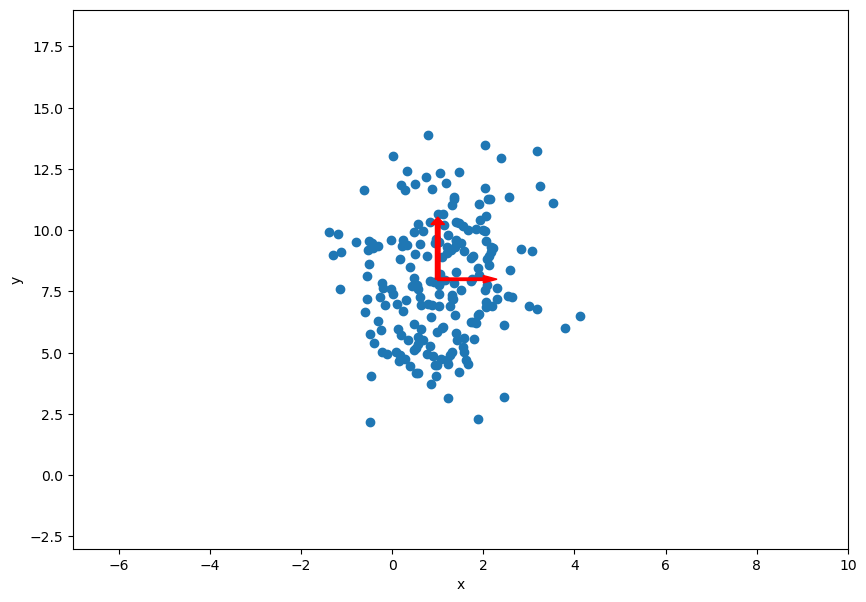

In [21]:
mean = np.array([1.0, 8.0])
cov = np.array([[1, 0], [0, 5]])

plot_samples(mean, cov)

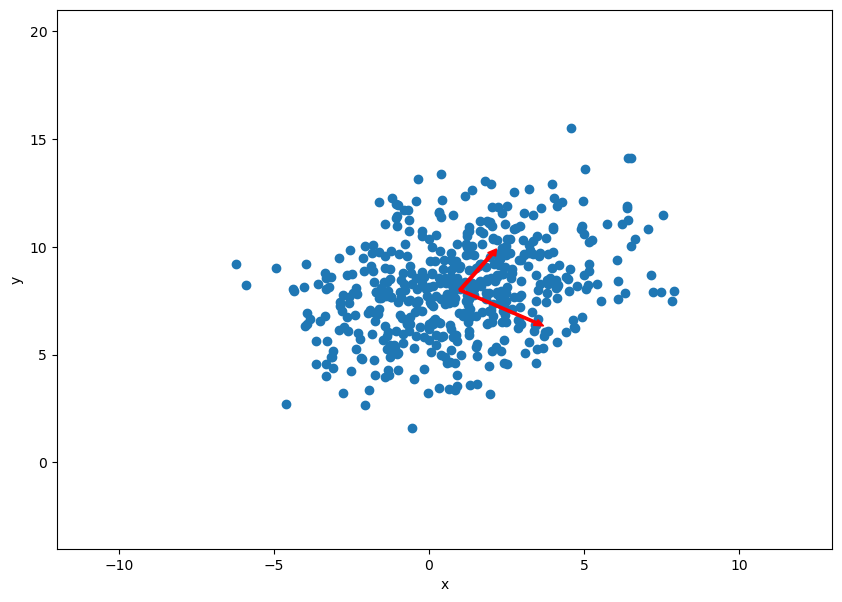

In [26]:
mean = np.array([1.0, 8.0])
cov = np.array([[7, 2], [2, 5]])

plot_samples(mean, cov, 500)